/var/folders/0f/xqbzpr016pd1f_xmdby2llv40000gn/T/ipykernel_1795/2847331551.py:20: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois_group_1 = ox.geometries_from_place(place_name, tags_group_1)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/osmnx/features.py:294: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union
/var/folders/0f/xqbzpr016pd1f_xmdby2llv40000gn/T/ipykernel_1795/2847331551.py:21: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geo

Clustered POI data saved to /./clustered_poi_data.csv


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/geopandas/geodataframe.py:1819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/geopandas/geodataframe.py:1819: PerformanceWarning: DataFrame i

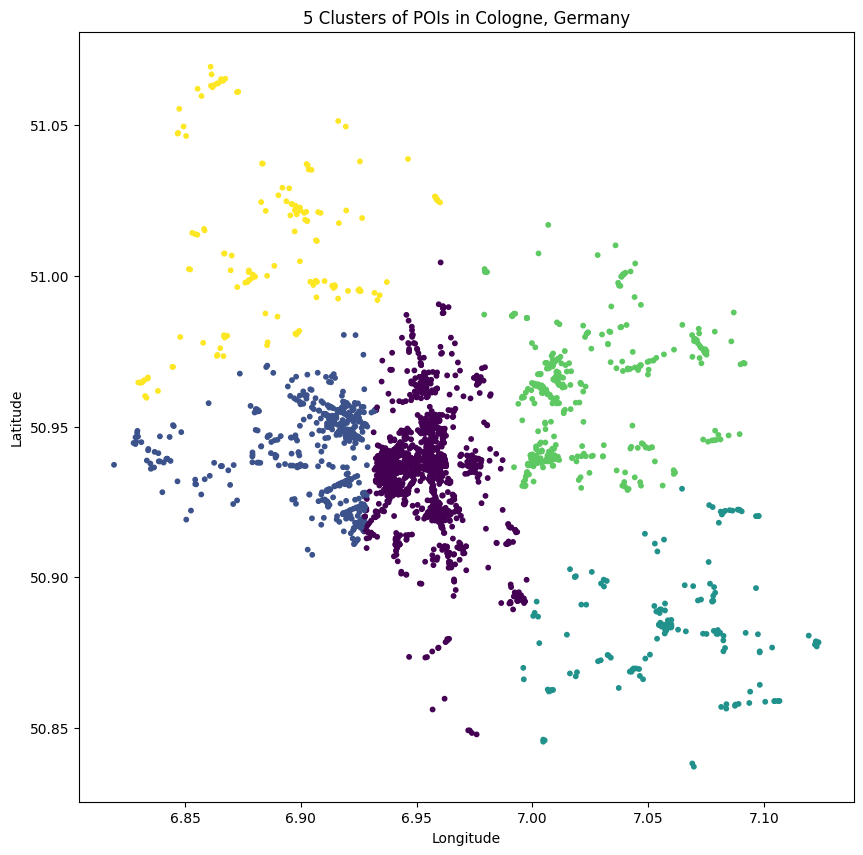

/var/folders/0f/xqbzpr016pd1f_xmdby2llv40000gn/T/ipykernel_1795/2847331551.py:68: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_place(place_name, tags_poi)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/osmnx/features.py:294: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [19]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Disable caching:
ox.settings.use_cache = False

# Define location and amenity types:
place_name = "Cologne, Germany"

# Groups of POIs to retrieve:
tags_group_1 = {'amenity': ['restaurant', 'cafe', 'bar', 'pub']}
tags_group_2 = {'amenity': ['park', 'library', 'hospital', 'kindergarten']}
tags_group_3 = {'amenity': ['college', 'bank', 'clinic', 'art_center']}
tags_group_4 = {'amenity': ['cinema', 'theatre', 'post_office', 'market_place']}

# Retrieve POI data for each group:
pois_group_1 = ox.geometries_from_place(place_name, tags_group_1)
pois_group_2 = ox.geometries_from_place(place_name, tags_group_2)
pois_group_3 = ox.geometries_from_place(place_name, tags_group_3)
pois_group_4 = ox.geometries_from_place(place_name, tags_group_4)

# Combine all groups into a single DataFrame:
pois = pd.concat([pois_group_1, pois_group_2, pois_group_3, pois_group_4])

# Select only Point geometries:
pois_points = pois[pois.geometry.geom_type == "Point"]

# Extract latitude and longitude values for clustering:
pois_points['lon'] = pois_points.geometry.x
pois_points['lat'] = pois_points.geometry.y

# Use only latitude and longitude columns for clustering:
poi_coordinates = pois_points[['lat', 'lon']].dropna()

# Apply K-means clustering:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(poi_coordinates[['lat', 'lon']])

# Add cluster labels to the DataFrame:
poi_coordinates['cluster'] = kmeans.labels_

# Save the updated DataFrame with clusters to a CSV file:
output_path = "./clustered_poi_data.csv"
poi_coordinates.to_csv(output_path, index=False)

print(f"Clustered POI data saved to {output_path}")

# Plot clusters using a scatter plot:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(poi_coordinates['lon'], poi_coordinates['lat'], c=poi_coordinates['cluster'], cmap='viridis', marker='o', s=10)
plt.title(f"{num_clusters} Clusters of POIs in {place_name}")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Retrieve all POIs at once by defining amenity types:
tags_poi = {'amenity': [
    'restaurant', 'park', 'cafe', 'bar', 'library',
    'hospital', 'kindergarten', 'college', 'bank', 'clinic',
    'art_center', 'cinema', 'theatre', 'post_office', 'market_place'
]}

# Fetch POI data with specified amenity types:
pois = ox.geometries_from_place(place_name, tags_poi)

# Extract only Point geometries and their coordinates:
pois_points = pois[pois.geometry.geom_type == "Point"]
pois_points['lon'] = pois_points.geometry.x
pois_points['lat'] = pois_points.geometry.y
poi_coordinates = pois_points[['lat', 'lon', 'amenity']]

# Save POI data to a CSV file:
poi_coordinates.to_csv("./test_file.csv", index=False)





